In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from scipy.interpolate import interp1d

In [288]:
downcast = pd.read_csv('curve1.csv')

In [289]:
downcast

,V,A
0,-1.708580,-0.000042
1,-1.700290,-0.000044
2,-1.687870,-0.000045
3,-1.678750,-0.000047
4,-1.667150,-0.000047
...,...,...
331,0.814912,0.000166
332,0.822368,0.000168
333,0.822368,0.000166
334,0.835831,0.000172


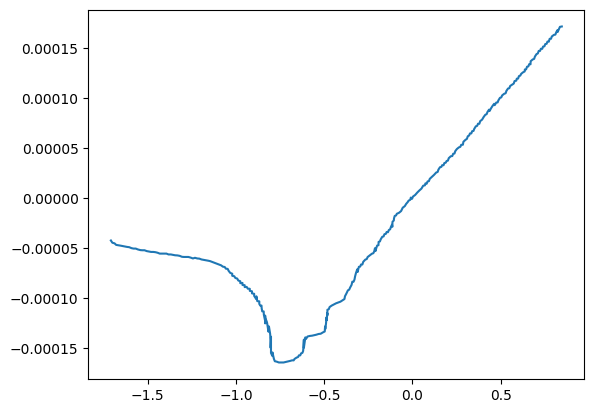

In [290]:
plt.plot(downcast['V'], downcast['A'])

In [291]:
v = np.linspace(downcast['V'][0], downcast['V'][335], 800)

In [292]:
v.shape

(800,)

In [293]:
int1d = interp1d(downcast['V'], downcast['A'])

In [294]:
a = int1d(v)

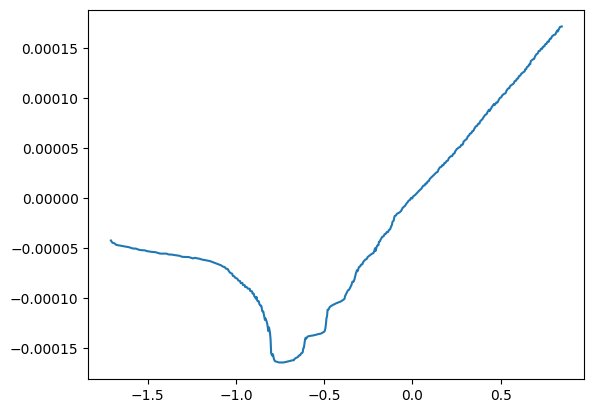

In [295]:
plt.plot(v, a)

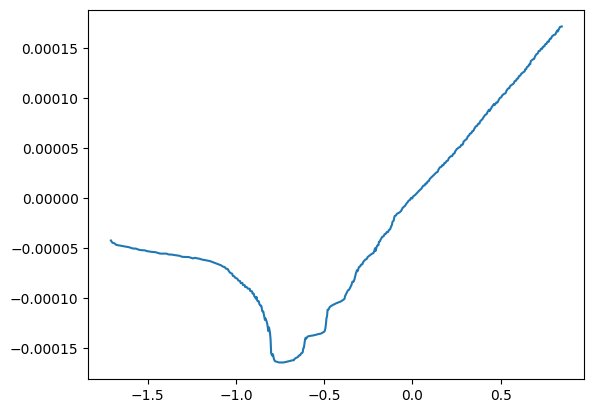

In [296]:
# plt.plot(v, i_n)
plt.plot(v, a)

In [16]:
from scipy.signal import savgol_filter

In [298]:
yhat = savgol_filter(a, 15, 1)

In [299]:
yhat.shape

(800,)

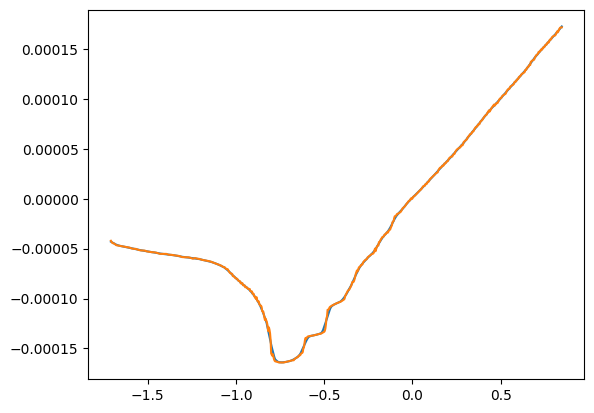

In [300]:
plt.plot(v, yhat)
plt.plot(v, a)

In [301]:
_dict = {
    "V": v,
    "A": yhat
}

downcast = pd.DataFrame(_dict)
downcast.to_csv('curve1.csv', index=False)

In [6]:
upcast = pd.read_csv('curve2.csv')

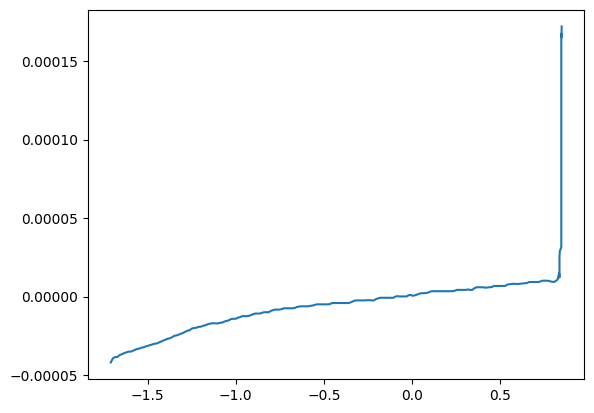

In [7]:
plt.plot(upcast['V'], upcast['A'])

In [8]:
upcast

,V,A
0,-1.708580,-0.000042
1,-1.708580,-0.000042
2,-1.696150,-0.000039
3,-1.696150,-0.000039
4,-1.683720,-0.000039
...,...,...
382,0.848258,0.000165
383,0.849293,0.000170
384,0.849293,0.000170
385,0.849293,0.000172


In [9]:
v = np.linspace(upcast['V'][0], upcast['V'][386], 800)

In [12]:
int1d = interp1d(upcast['V'], upcast['A'])

In [13]:
a = int1d(v)

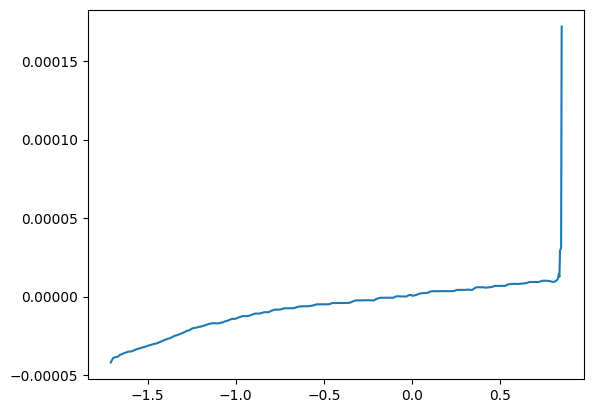

In [14]:
plt.plot(v, a)

In [17]:
yhat = savgol_filter(a, 3, 1)

In [18]:
len(yhat)

800

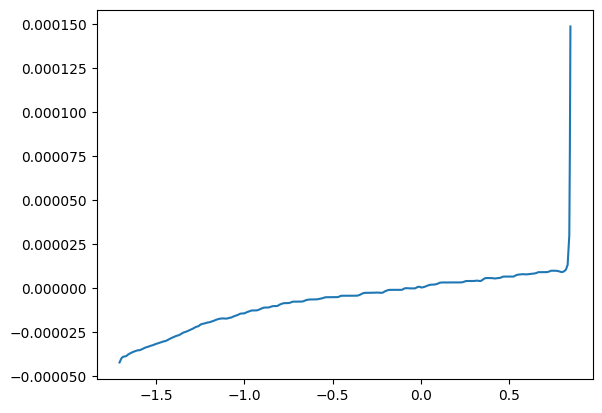

In [19]:
plt.plot(v, yhat)

In [23]:
# plt.plot(v, yhat)
# plt.plot(v, a)

In [23]:
_dict = {
    "V": v,
    "A": a
}

upcast = pd.DataFrame(_dict)
upcast.to_csv('curve2.csv', index=False)

In [24]:
c1 = pd.read_csv('curve1.csv')
c2 = pd.read_csv('curve2.csv')

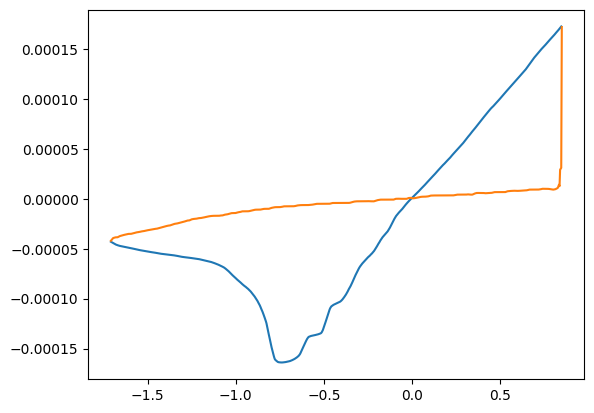

In [25]:
plt.plot(c1['V'], c1['A'])
plt.plot(c2['V'], c2['A'])

In [26]:
time = pd.read_csv('time.csv')

In [27]:
time

,x,y
0,0.010601,0.021583
1,0.187279,0.143885
2,0.441696,0.280576
3,0.618375,0.374101
4,0.865724,0.517986
...,...,...
66,9.530035,-0.100719
67,9.657244,-0.100719
68,9.798587,-0.057554
69,9.897527,-0.014388


In [28]:
from scipy import interpolate

In [29]:
int1d = interp1d(time['x'], time['y'])

In [33]:
t = np.linspace(time['x'][0], time['x'][70], 1667)

In [35]:
v = int1d(t)

In [39]:
_dict = {
    "t": t,
    "v": v
}

df = pd.DataFrame(_dict)
df.to_csv('time.csv', index=False)